#UAS Bengkel Koding - DS 04
Muhammad Za'im Muzakki

A11.2022.14023

Prediksi Churn Pelanggan Telekomunikasi

In [1]:
# ============================================================================
# IMPORT LIBRARY
# ============================================================================

# Library dasar
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Library modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Library evaluasi
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

# Library hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Library untuk menyimpan model
import joblib
import pickle

print("Semua library berhasil diimport!")


Semua library berhasil diimport!


In [2]:
# ============================================================================
# LOAD DATASET
# ============================================================================

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Baca dataset dari Google Drive
path = '/content/drive/MyDrive/Bengkel Koding/UAS/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Load dataset
df = pd.read_csv(path)

# Informasi dataset
print("\nDataset berhasil dimuat dari Google Drive!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Mounted at /content/drive

Dataset berhasil dimuat dari Google Drive!
Jumlah baris: 7043
Jumlah kolom: 21


#1. EDA - Exploratory Data Analysis

In [3]:
# ============================================================================
# 1.1. Eksplorasi Awal
# ============================================================================

print("\n1.1. EKSPLORASI AWAL")
print("-" * 80)

# Tampilkan 5 baris pertama
print("\n5 Baris Pertama Dataset:")
df.head()


1.1. EKSPLORASI AWAL
--------------------------------------------------------------------------------

5 Baris Pertama Dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Ringkasan informasi dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

In [5]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Statistik deskriptif untuk kolom kategorikal
print("\nStatistik Deskriptif Kolom Kategorikal:")
df.describe(include='object')


Statistik Deskriptif Kolom Kategorikal:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
# ============================================================================
# 1.2. Identifikasi Missing Value
# ============================================================================

print("\n1.2. IDENTIFIKASI MISSING VALUE")
print("-" * 80)

# Hitung jumlah dan persentase missing value
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Buat DataFrame untuk missing value
missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing': missing_values.values,
    'Persentase Missing': missing_percentage.values
})

# Filter hanya kolom yang memiliki missing value
missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values('Jumlah Missing', ascending=False)

print("\nMissing Value per Kolom:")
print(missing_df)


1.2. IDENTIFIKASI MISSING VALUE
--------------------------------------------------------------------------------

Missing Value per Kolom:
Empty DataFrame
Columns: [Kolom, Jumlah Missing, Persentase Missing]
Index: []


In [8]:
# Visualisasi missing value
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Kolom'], missing_df['Persentase Missing'], color='coral')
    plt.xlabel('Kolom', fontsize=12)
    plt.ylabel('Persentase Missing Value (%)', fontsize=12)
    plt.title('Persentase Missing Value per Kolom', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nTidak ada missing value dalam dataset!")


Tidak ada missing value dalam dataset!


In [9]:
# Cek tipe data TotalCharges (seharusnya numeric tapi tercatat sebagai object)
print(f"\nTipe data TotalCharges: {df['TotalCharges'].dtype}")


Tipe data TotalCharges: object


In [10]:
# Cek apakah ada nilai non-numeric di TotalCharges
if df['TotalCharges'].dtype == 'object':
    print("\nContoh nilai TotalCharges (5 pertama):")
    print(df['TotalCharges'].head(10))

    # Cek nilai unique yang bukan angka
    non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]['TotalCharges'].unique()
    print(f"\nNilai non-numeric dalam TotalCharges: {non_numeric}")
    print(f"Jumlah nilai non-numeric: {len(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])}")


Contoh nilai TotalCharges (5 pertama):
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

Nilai non-numeric dalam TotalCharges: [' ']
Jumlah nilai non-numeric: 11



1.3. VISUALISASI DISTRIBUSI TARGET (CHURN)
--------------------------------------------------------------------------------

Distribusi Variabel Target (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Persentase:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


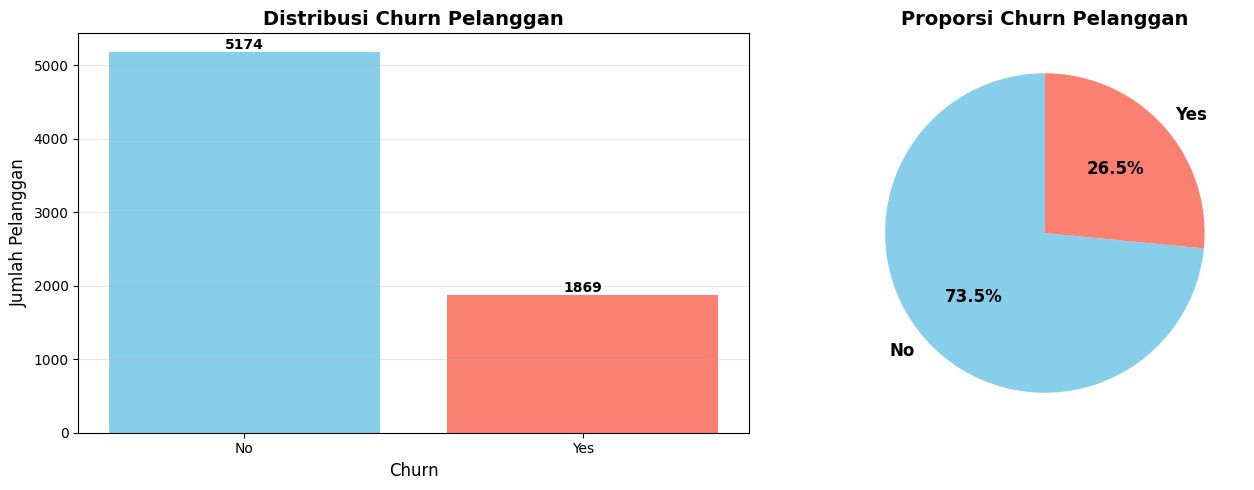

In [11]:
# ============================================================================
# 1.3. Visualisasi Distribusi Target
# ============================================================================

print("\n1.3. VISUALISASI DISTRIBUSI TARGET (CHURN)")
print("-" * 80)

# Hitung distribusi target
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("\nDistribusi Variabel Target (Churn):")
print(churn_counts)
print("\nPersentase:")
print(churn_percentage)

# Visualisasi distribusi target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Jumlah Pelanggan', fontsize=12)
axes[0].set_title('Distribusi Churn Pelanggan', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Tambahkan label jumlah di atas bar
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['skyblue', 'salmon']
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporsi Churn Pelanggan', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# Interpretasi(Pemberian kesan) keseimbangan kelas
ratio = churn_counts.min() / churn_counts.max()
print(f"\nRasio kelas minoritas terhadap mayoritas: {ratio:.2f}")
if ratio < 0.3:
    print("Dataset SANGAT TIDAK SEIMBANG (Highly Imbalanced)")
elif ratio < 0.5:
    print("Dataset TIDAK SEIMBANG (Imbalanced)")
elif ratio < 0.7:
    print("Dataset CUKUP SEIMBANG (Moderately Balanced)")
else:
    print("Dataset SEIMBANG (Balanced)")


Rasio kelas minoritas terhadap mayoritas: 0.36
Dataset TIDAK SEIMBANG (Imbalanced)


In [13]:
# ============================================================================
# 1.4. Analisis Korelasi
# ============================================================================

print("\n1.4. ANALISIS KORELASI FITUR NUMERIK")
print("-" * 80)

# Identifikasi kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nKolom numerik: {numeric_cols}")

# Buat copy dataframe untuk analisis korelasi
df_corr = df.copy()

# Convert TotalCharges ke numeric jika masih object
if df_corr['TotalCharges'].dtype == 'object':
    df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')

# Encode variabel target untuk korelasi
df_corr['Churn_Encoded'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Pilih kolom numerik termasuk target yang sudah di-encode
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Encoded']
df_numeric = df_corr[numeric_features].dropna()

# Hitung matriks korelasi
correlation_matrix = df_numeric.corr()

print("\nMatriks Korelasi:")
print(correlation_matrix)


1.4. ANALISIS KORELASI FITUR NUMERIK
--------------------------------------------------------------------------------

Kolom numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

Matriks Korelasi:
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.015683        0.219874      0.102411   
tenure               0.015683  1.000000        0.246862      0.825880   
MonthlyCharges       0.219874  0.246862        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn_Encoded        0.150541 -0.354049        0.192858     -0.199484   

                Churn_Encoded  
SeniorCitizen        0.150541  
tenure              -0.354049  
MonthlyCharges       0.192858  
TotalCharges        -0.199484  
Churn_Encoded        1.000000  


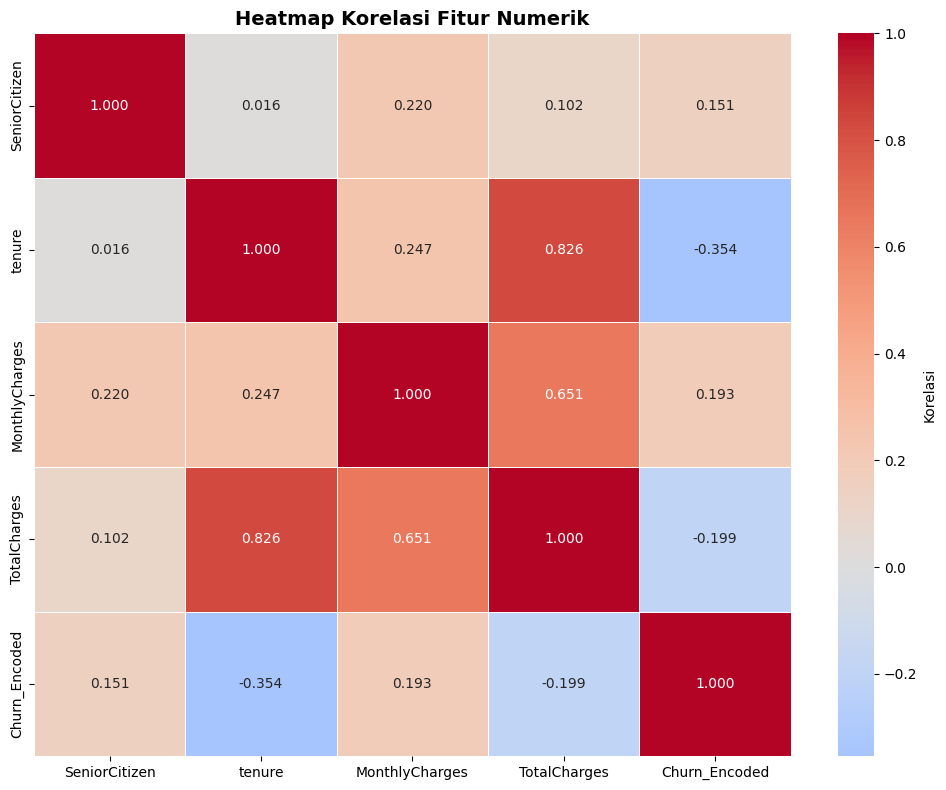

In [14]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', linewidths=0.5, cbar_kws={'label': 'Korelasi'})
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [15]:
# Analisis korelasi dengan target
print("\nKorelasi Fitur dengan Target (Churn):")
churn_correlation = correlation_matrix['Churn_Encoded'].sort_values(ascending=False)
print(churn_correlation)


Korelasi Fitur dengan Target (Churn):
Churn_Encoded     1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn_Encoded, dtype: float64


In [16]:
# Interpretasi
print("\nInterpretasi Korelasi dengan Churn:")
for feature, corr_value in churn_correlation.items():
    if feature != 'Churn_Encoded':
        if abs(corr_value) >= 0.3:
            strength = "KUAT"
        elif abs(corr_value) >= 0.1:
            strength = "SEDANG"
        else:
            strength = "LEMAH"

        direction = "POSITIF" if corr_value > 0 else "NEGATIF"
        print(f"  - {feature}: {corr_value:.3f} ({strength}, {direction})")


Interpretasi Korelasi dengan Churn:
  - MonthlyCharges: 0.193 (SEDANG, POSITIF)
  - SeniorCitizen: 0.151 (SEDANG, POSITIF)
  - TotalCharges: -0.199 (SEDANG, NEGATIF)
  - tenure: -0.354 (KUAT, NEGATIF)



1.5. ANALISIS DISTRIBUSI FITUR PENTING
--------------------------------------------------------------------------------


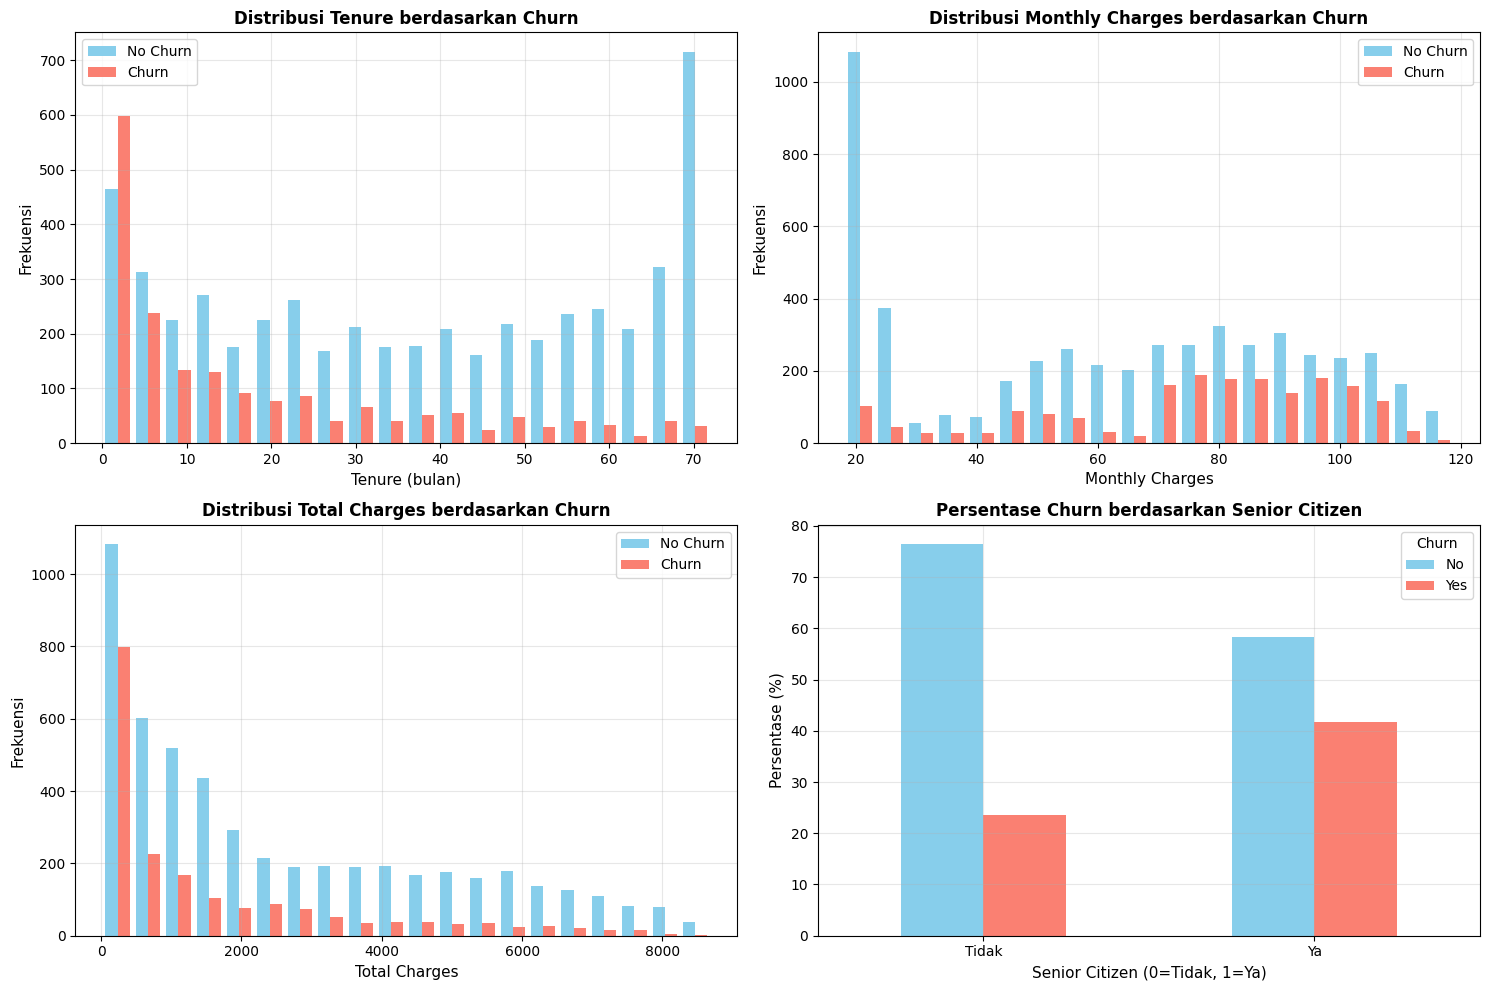


EDA selesai!


In [17]:
# ============================================================================
# ANALISIS TAMBAHAN: DISTRIBUSI FITUR PENTING
# ============================================================================

print("\n1.5. ANALISIS DISTRIBUSI FITUR PENTING")
print("-" * 80)

# Visualisasi distribusi fitur numerik terhadap Churn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# tenure
axes[0, 0].hist([df[df['Churn']=='No']['tenure'], df[df['Churn']=='Yes']['tenure']],
                bins=20, label=['No Churn', 'Churn'], color=['skyblue', 'salmon'])
axes[0, 0].set_xlabel('Tenure (bulan)', fontsize=11)
axes[0, 0].set_ylabel('Frekuensi', fontsize=11)
axes[0, 0].set_title('Distribusi Tenure berdasarkan Churn', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# MonthlyCharges
axes[0, 1].hist([df[df['Churn']=='No']['MonthlyCharges'], df[df['Churn']=='Yes']['MonthlyCharges']],
                bins=20, label=['No Churn', 'Churn'], color=['skyblue', 'salmon'])
axes[0, 1].set_xlabel('Monthly Charges', fontsize=11)
axes[0, 1].set_ylabel('Frekuensi', fontsize=11)
axes[0, 1].set_title('Distribusi Monthly Charges berdasarkan Churn', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# TotalCharges (convert dulu jika perlu)
df_plot = df.copy()
if df_plot['TotalCharges'].dtype == 'object':
    df_plot['TotalCharges'] = pd.to_numeric(df_plot['TotalCharges'], errors='coerce')

axes[1, 0].hist([df_plot[df_plot['Churn']=='No']['TotalCharges'].dropna(),
                 df_plot[df_plot['Churn']=='Yes']['TotalCharges'].dropna()],
                bins=20, label=['No Churn', 'Churn'], color=['skyblue', 'salmon'])
axes[1, 0].set_xlabel('Total Charges', fontsize=11)
axes[1, 0].set_ylabel('Frekuensi', fontsize=11)
axes[1, 0].set_title('Distribusi Total Charges berdasarkan Churn', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# SeniorCitizen
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
senior_churn.plot(kind='bar', ax=axes[1, 1], color=['skyblue', 'salmon'])
axes[1, 1].set_xlabel('Senior Citizen (0=Tidak, 1=Ya)', fontsize=11)
axes[1, 1].set_ylabel('Persentase (%)', fontsize=11)
axes[1, 1].set_title('Persentase Churn berdasarkan Senior Citizen', fontsize=12, fontweight='bold')
axes[1, 1].legend(title='Churn')
axes[1, 1].set_xticklabels(['Tidak', 'Ya'], rotation=0)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEDA selesai!")

# 2. DIRECT MODELING (TANPA PREPROCESSING)

In [18]:
# ============================================================================
# 2.1. Persiapan Data untuk Direct Modeling
# ============================================================================

print("\n2.1. PERSIAPAN DATA")
print("-" * 80)

# Buat copy dataset
df_direct = df.copy()

# Convert TotalCharges ke numeric
df_direct['TotalCharges'] = pd.to_numeric(df_direct['TotalCharges'], errors='coerce')

# Drop customerID karena tidak relevan untuk prediksi
df_direct = df_direct.drop('customerID', axis=1)

# Encode semua variabel kategorikal menggunakan Label Encoding
label_encoders = {}
categorical_cols = df_direct.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_direct[col] = le.fit_transform(df_direct[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded kolom: {col}")

# Handle missing values dengan SimpleImputer (median untuk numerik)
imputer = SimpleImputer(strategy='median')
df_direct_imputed = pd.DataFrame(
    imputer.fit_transform(df_direct),
    columns=df_direct.columns
)

print(f"\nJumlah missing values setelah imputation: {df_direct_imputed.isnull().sum().sum()}")


2.1. PERSIAPAN DATA
--------------------------------------------------------------------------------
Encoded kolom: gender
Encoded kolom: Partner
Encoded kolom: Dependents
Encoded kolom: PhoneService
Encoded kolom: MultipleLines
Encoded kolom: InternetService
Encoded kolom: OnlineSecurity
Encoded kolom: OnlineBackup
Encoded kolom: DeviceProtection
Encoded kolom: TechSupport
Encoded kolom: StreamingTV
Encoded kolom: StreamingMovies
Encoded kolom: Contract
Encoded kolom: PaperlessBilling
Encoded kolom: PaymentMethod
Encoded kolom: Churn

Jumlah missing values setelah imputation: 0


In [19]:
# ============================================================================
# 2.2. Train-Test Split
# ============================================================================

print("\n2.2. TRAIN-TEST SPLIT")
print("-" * 80)

# Pisahkan fitur dan target
X_direct = df_direct_imputed.drop('Churn', axis=1)
y_direct = df_direct_imputed['Churn']

# Split data (80% train, 20% test)
X_train_direct, X_test_direct, y_train_direct, y_test_direct = train_test_split(
    X_direct, y_direct, test_size=0.2, random_state=42, stratify=y_direct
)

print(f"Jumlah data training: {len(X_train_direct)}")
print(f"Jumlah data testing: {len(X_test_direct)}")
print(f"\nDistribusi target di data training:")
print(y_train_direct.value_counts())
print(f"\nDistribusi target di data testing:")
print(y_test_direct.value_counts())



2.2. TRAIN-TEST SPLIT
--------------------------------------------------------------------------------
Jumlah data training: 5634
Jumlah data testing: 1409

Distribusi target di data training:
Churn
0.0    4139
1.0    1495
Name: count, dtype: int64

Distribusi target di data testing:
Churn
0.0    1035
1.0     374
Name: count, dtype: int64


In [20]:
# ============================================================================
# 2.3. Inisialisasi Model
# ============================================================================

print("\n2.3. INISIALISASI MODEL")
print("-" * 80)

# Model 1: Logistic Regression (Konvensional)
model_lr_direct = LogisticRegression(random_state=42, max_iter=1000)
print("Model 1: Logistic Regression (Konvensional)")

# Model 2: Random Forest (Ensemble Bagging)
model_rf_direct = RandomForestClassifier(random_state=42)
print("Model 2: Random Forest (Ensemble Bagging)")

# Model 3: Voting Classifier (Ensemble Voting)
# Gabungan Logistic Regression, SVM, dan KNN
voting_estimators = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('svm', SVC(random_state=42, probability=True)),
    ('knn', KNeighborsClassifier())
]
model_voting_direct = VotingClassifier(estimators=voting_estimators, voting='soft')
print("Model 3: Voting Classifier (Ensemble Voting: LR + SVM + KNN)")


2.3. INISIALISASI MODEL
--------------------------------------------------------------------------------
Model 1: Logistic Regression (Konvensional)
Model 2: Random Forest (Ensemble Bagging)
Model 3: Voting Classifier (Ensemble Voting: LR + SVM + KNN)


In [21]:
# ============================================================================
# 2.4. Training Model
# ============================================================================

print("\n2.4. TRAINING MODEL")
print("-" * 80)

# Dictionary untuk menyimpan model
models_direct = {
    'Logistic Regression': model_lr_direct,
    'Random Forest': model_rf_direct,
    'Voting Classifier': model_voting_direct
}

# Training semua model
for name, model in models_direct.items():
    print(f"\nMelatih model: {name}...")
    model.fit(X_train_direct, y_train_direct)
    print(f"Model {name} berhasil dilatih!")


2.4. TRAINING MODEL
--------------------------------------------------------------------------------

Melatih model: Logistic Regression...
Model Logistic Regression berhasil dilatih!

Melatih model: Random Forest...
Model Random Forest berhasil dilatih!

Melatih model: Voting Classifier...
Model Voting Classifier berhasil dilatih!



2.5. EVALUASI MODEL DIRECT MODELING
--------------------------------------------------------------------------------

HASIL EVALUASI: Logistic Regression
Accuracy  : 0.7991
Precision : 0.6409
Recall    : 0.5535
F1-Score  : 0.5940

Confusion Matrix:
[[919 116]
 [167 207]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



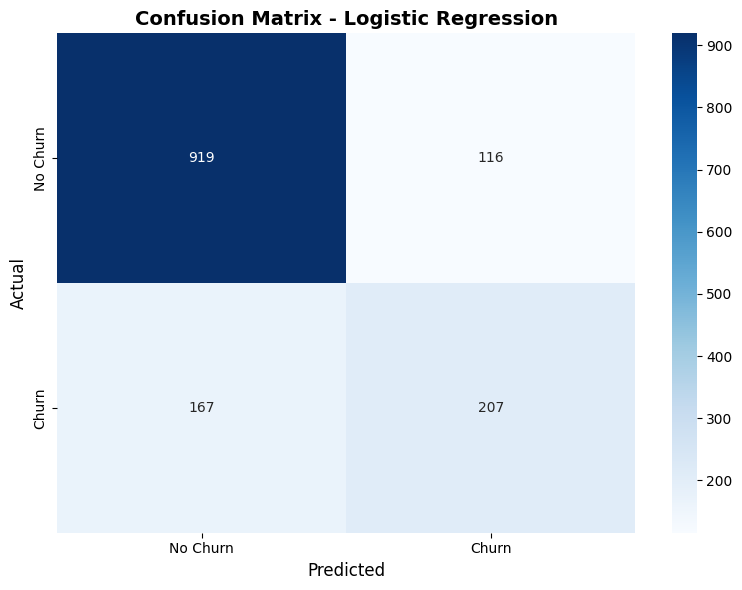


HASIL EVALUASI: Random Forest
Accuracy  : 0.7921
Precision : 0.6373
Recall    : 0.5027
F1-Score  : 0.5620

Confusion Matrix:
[[928 107]
 [186 188]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.86      1035
       Churn       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



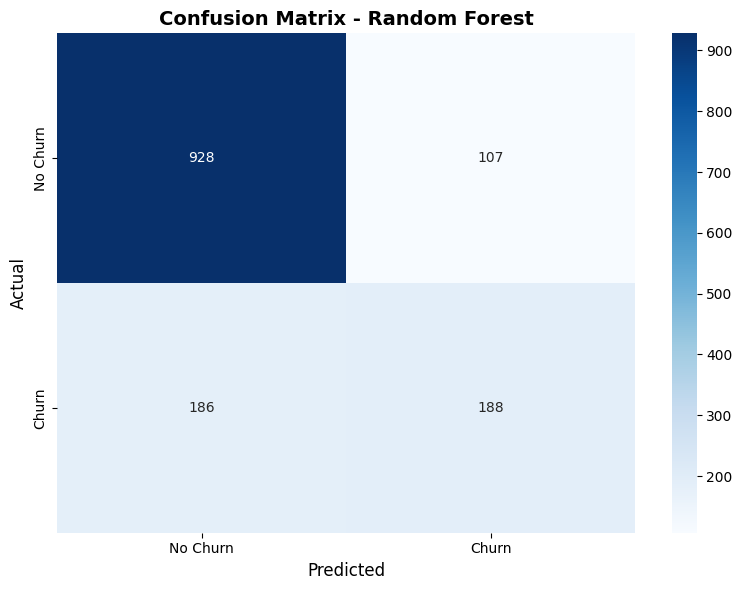


HASIL EVALUASI: Voting Classifier
Accuracy  : 0.7963
Precision : 0.6761
Recall    : 0.4465
F1-Score  : 0.5378

Confusion Matrix:
[[955  80]
 [207 167]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.92      0.87      1035
       Churn       0.68      0.45      0.54       374

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



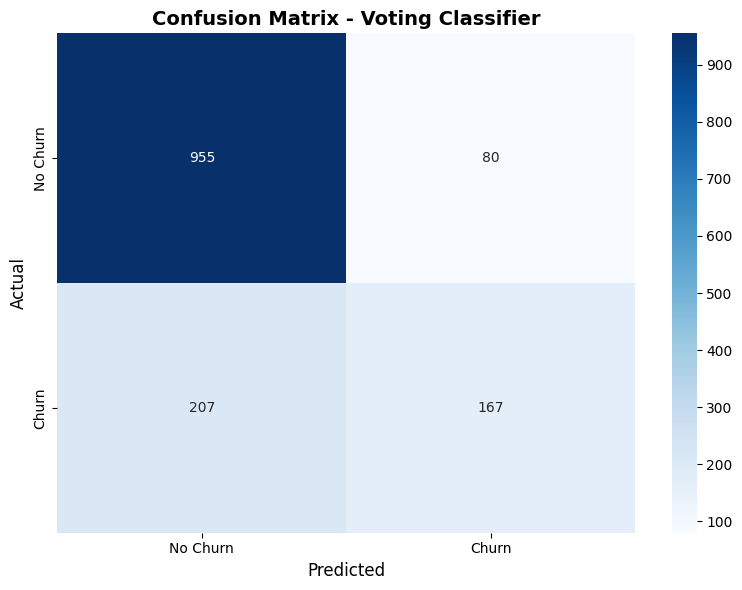

In [22]:
# ============================================================================
# 2.5. Evaluasi Model
# ============================================================================

print("\n2.5. EVALUASI MODEL DIRECT MODELING")
print("-" * 80)

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name):
    """
    Fungsi untuk mengevaluasi performa model
    """
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print hasil
    print(f"\n{'='*60}")
    print(f"HASIL EVALUASI: {model_name}")
    print(f"{'='*60}")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-Score  : {f1:.4f}")

    print(f"\nConfusion Matrix:")
    print(cm)

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

# Evaluasi semua model
results_direct = {}
for name, model in models_direct.items():
    results_direct[name] = evaluate_model(model, X_test_direct, y_test_direct, name)



2.6. PERBANDINGAN PERFORMA MODEL DIRECT MODELING
--------------------------------------------------------------------------------

Tabel Perbandingan Performa:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.799148   0.640867 0.553476  0.593974
      Random Forest  0.792051   0.637288 0.502674  0.562033
  Voting Classifier  0.796309   0.676113 0.446524  0.537842


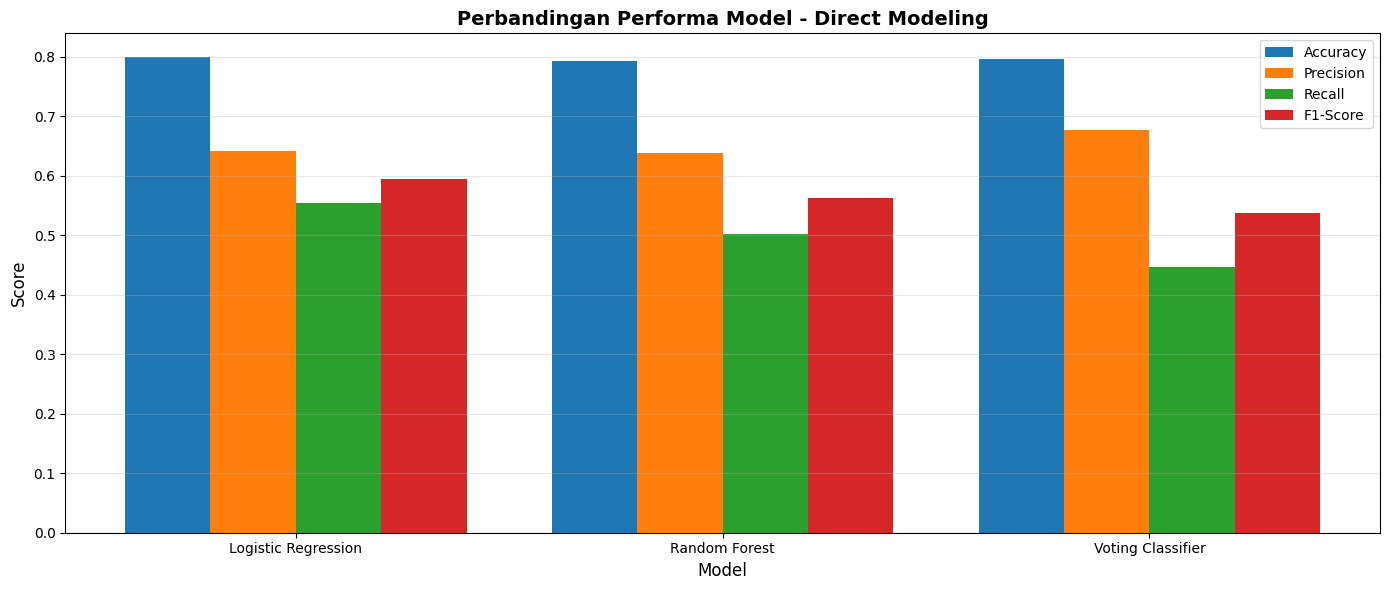


Model terbaik (Direct Modeling): Logistic Regression

Direct Modeling selesai!


In [23]:
# ============================================================================
# 2.6. Perbandingan Performa Model
# ============================================================================

print("\n2.6. PERBANDINGAN PERFORMA MODEL DIRECT MODELING")
print("-" * 80)

# Buat DataFrame untuk perbandingan
comparison_direct = pd.DataFrame({
    'Model': list(results_direct.keys()),
    'Accuracy': [results_direct[m]['accuracy'] for m in results_direct.keys()],
    'Precision': [results_direct[m]['precision'] for m in results_direct.keys()],
    'Recall': [results_direct[m]['recall'] for m in results_direct.keys()],
    'F1-Score': [results_direct[m]['f1_score'] for m in results_direct.keys()]
})

print("\nTabel Perbandingan Performa:")
print(comparison_direct.to_string(index=False))

# Visualisasi perbandingan
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison_direct))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

for i, metric in enumerate(metrics):
    offset = width * (i - 1.5)
    ax.bar(x + offset, comparison_direct[metric], width, label=metric)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Perbandingan Performa Model - Direct Modeling', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_direct['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Identifikasi model terbaik berdasarkan F1-Score
best_model_direct = comparison_direct.loc[comparison_direct['F1-Score'].idxmax(), 'Model']
print(f"\nModel terbaik (Direct Modeling): {best_model_direct}")

print("\nDirect Modeling selesai!")

# 3. MODELING DENGAN PREPROCESSING

In [24]:
# ============================================================================
# 3.1. Data Preprocessing
# ============================================================================

print("\n3.1. DATA PREPROCESSING")
print("-" * 80)

# Buat copy dataset
df_prep = df.copy()

print("Langkah 1: Menangani Missing Values")
print("-" * 40)

# Convert TotalCharges ke numeric
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')
print(f"TotalCharges dikonversi ke numeric")
print(f"Jumlah missing values di TotalCharges: {df_prep['TotalCharges'].isnull().sum()}")

# Isi missing values di TotalCharges dengan 0 (asumsi: pelanggan baru belum bayar)
df_prep['TotalCharges'].fillna(0, inplace=True)
print(f"Missing values di TotalCharges diisi dengan 0")

print("\nLangkah 2: Menangani Duplikasi")
print("-" * 40)

# Cek duplikasi
duplicates = df_prep.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates > 0:
    df_prep = df_prep.drop_duplicates()
    print(f"Duplikasi telah dihapus")
else:
    print("Tidak ada duplikasi dalam dataset")

print("\nLangkah 3: Menangani Outlier")
print("-" * 40)

# Identifikasi outlier menggunakan IQR untuk kolom numerik
numeric_cols_for_outlier = ['tenure', 'MonthlyCharges', 'TotalCharges']

def detect_outliers_iqr(df, column):
    """
    Deteksi outlier menggunakan metode IQR
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nDeteksi Outlier:")
for col in numeric_cols_for_outlier:
    n_outliers, lower, upper = detect_outliers_iqr(df_prep, col)
    print(f"  - {col}: {n_outliers} outliers (batas: {lower:.2f} - {upper:.2f})")

# Untuk kasus ini, kita tidak menghapus outlier karena bisa jadi merupakan pola valid
# (misalnya pelanggan dengan biaya tinggi atau tenure panjang)
print("\nKeputusan: Outlier tidak dihapus karena merupakan pola bisnis yang valid")

print("\nLangkah 4: Drop Kolom Tidak Relevan")
print("-" * 40)

# Drop customerID karena tidak relevan untuk prediksi
df_prep = df_prep.drop('customerID', axis=1)
print("Kolom 'customerID' telah dihapus")

print("\nLangkah 5: Encoding Variabel Kategorikal")
print("-" * 40)

# Identifikasi kolom kategorikal (kecuali target)
categorical_cols_prep = df_prep.select_dtypes(include='object').columns.tolist()
categorical_cols_prep.remove('Churn')  # Exclude target

print(f"Kolom kategorikal yang akan di-encode: {len(categorical_cols_prep)} kolom")

# Gunakan Label Encoding untuk semua variabel kategorikal
label_encoders_prep = {}
for col in categorical_cols_prep:
    le = LabelEncoder()
    df_prep[col] = le.fit_transform(df_prep[col])
    label_encoders_prep[col] = le
    print(f"  - Encoded: {col}")

# Encode target variable
le_target = LabelEncoder()
df_prep['Churn'] = le_target.fit_transform(df_prep['Churn'])
print(f"  - Encoded: Churn (target)")

print("\nLangkah 6: Feature Scaling")
print("-" * 40)

# Pisahkan fitur dan target terlebih dahulu
X_prep = df_prep.drop('Churn', axis=1)
y_prep = df_prep['Churn']

# Identifikasi kolom yang perlu di-scaling (numerik dengan skala berbeda)
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Gunakan StandardScaler
scaler = StandardScaler()
X_prep[cols_to_scale] = scaler.fit_transform(X_prep[cols_to_scale])

print(f"Kolom yang di-scaling: {cols_to_scale}")
print("Scaling menggunakan StandardScaler")

print("\nPreprocessing selesai!")
print(f"Jumlah sampel setelah preprocessing: {len(df_prep)}")
print(f"Jumlah fitur setelah preprocessing: {X_prep.shape[1]}")


3.1. DATA PREPROCESSING
--------------------------------------------------------------------------------
Langkah 1: Menangani Missing Values
----------------------------------------
TotalCharges dikonversi ke numeric
Jumlah missing values di TotalCharges: 11
Missing values di TotalCharges diisi dengan 0

Langkah 2: Menangani Duplikasi
----------------------------------------
Jumlah baris duplikat: 0
Tidak ada duplikasi dalam dataset

Langkah 3: Menangani Outlier
----------------------------------------

Deteksi Outlier:
  - tenure: 0 outliers (batas: -60.00 - 124.00)
  - MonthlyCharges: 0 outliers (batas: -46.02 - 171.38)
  - TotalCharges: 0 outliers (batas: -4683.52 - 8868.67)

Keputusan: Outlier tidak dihapus karena merupakan pola bisnis yang valid

Langkah 4: Drop Kolom Tidak Relevan
----------------------------------------
Kolom 'customerID' telah dihapus

Langkah 5: Encoding Variabel Kategorikal
----------------------------------------
Kolom kategorikal yang akan di-encode: 15 ko

In [25]:
# ============================================================================
# 3.2. Train-Test Split
# ============================================================================

print("\n3.2. TRAIN-TEST SPLIT")
print("-" * 80)

# Split data (80% train, 20% test) dengan stratify
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(
    X_prep, y_prep, test_size=0.2, random_state=42, stratify=y_prep
)

print(f"Jumlah data training: {len(X_train_prep)}")
print(f"Jumlah data testing: {len(X_test_prep)}")
print(f"\nDistribusi target di data training:")
print(y_train_prep.value_counts())
print(f"\nDistribusi target di data testing:")
print(y_test_prep.value_counts())


3.2. TRAIN-TEST SPLIT
--------------------------------------------------------------------------------
Jumlah data training: 5634
Jumlah data testing: 1409

Distribusi target di data training:
Churn
0    4139
1    1495
Name: count, dtype: int64

Distribusi target di data testing:
Churn
0    1035
1     374
Name: count, dtype: int64


In [26]:
# ============================================================================
# 3.3. Inisialisasi dan Training Model
# ============================================================================

print("\n3.3. INISIALISASI DAN TRAINING MODEL")
print("-" * 80)

# Inisialisasi model yang sama dengan Direct Modeling
model_lr_prep = LogisticRegression(random_state=42, max_iter=1000)
model_rf_prep = RandomForestClassifier(random_state=42)

voting_estimators_prep = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('svm', SVC(random_state=42, probability=True)),
    ('knn', KNeighborsClassifier())
]
model_voting_prep = VotingClassifier(estimators=voting_estimators_prep, voting='soft')

# Dictionary untuk menyimpan model
models_prep = {
    'Logistic Regression': model_lr_prep,
    'Random Forest': model_rf_prep,
    'Voting Classifier': model_voting_prep
}

# Training semua model
for name, model in models_prep.items():
    print(f"\nMelatih model: {name}...")
    model.fit(X_train_prep, y_train_prep)
    print(f"Model {name} berhasil dilatih!")


3.3. INISIALISASI DAN TRAINING MODEL
--------------------------------------------------------------------------------

Melatih model: Logistic Regression...
Model Logistic Regression berhasil dilatih!

Melatih model: Random Forest...
Model Random Forest berhasil dilatih!

Melatih model: Voting Classifier...
Model Voting Classifier berhasil dilatih!



3.4. EVALUASI MODEL DENGAN PREPROCESSING
--------------------------------------------------------------------------------

HASIL EVALUASI: Logistic Regression
Accuracy  : 0.7999
Precision : 0.6447
Recall    : 0.5481
F1-Score  : 0.5925

Confusion Matrix:
[[922 113]
 [169 205]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



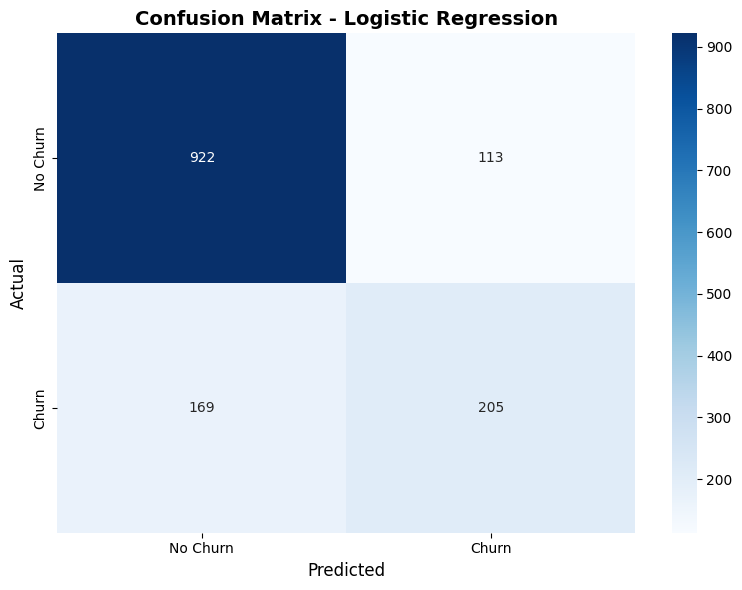


HASIL EVALUASI: Random Forest
Accuracy  : 0.7935
Precision : 0.6388
Recall    : 0.5107
F1-Score  : 0.5676

Confusion Matrix:
[[927 108]
 [183 191]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.86      1035
       Churn       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



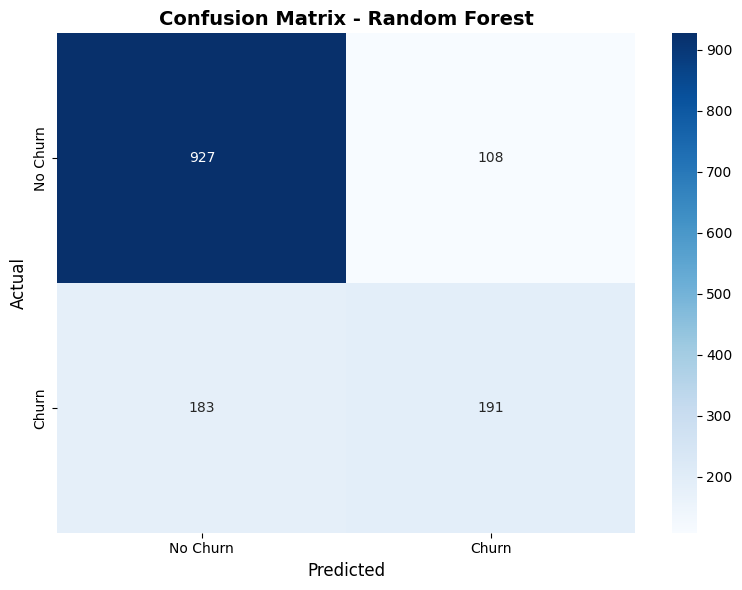


HASIL EVALUASI: Voting Classifier
Accuracy  : 0.7899
Precision : 0.6393
Recall    : 0.4786
F1-Score  : 0.5474

Confusion Matrix:
[[934 101]
 [195 179]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.86      1035
       Churn       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



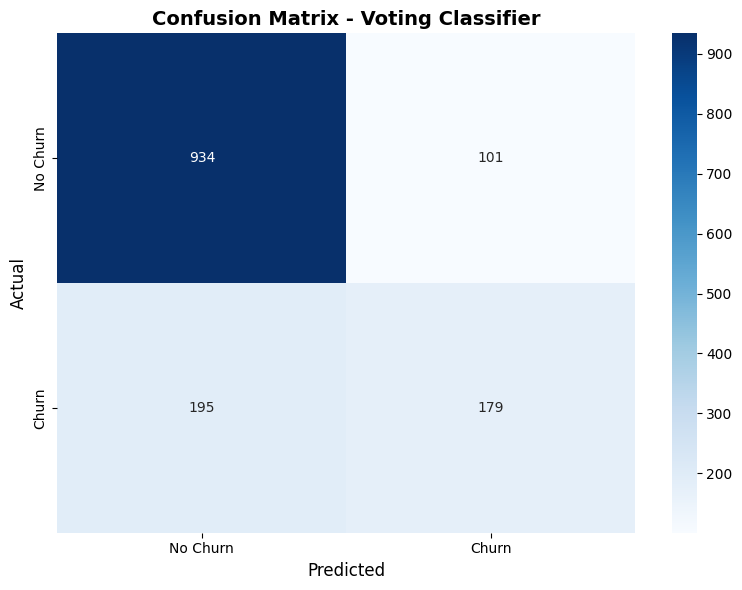

In [27]:
# ============================================================================
# 3.4. Evaluasi Model
# ============================================================================

print("\n3.4. EVALUASI MODEL DENGAN PREPROCESSING")
print("-" * 80)

# Evaluasi semua model
results_prep = {}
for name, model in models_prep.items():
    results_prep[name] = evaluate_model(model, X_test_prep, y_test_prep, name)



3.5. PERBANDINGAN PERFORMA MODEL DENGAN PREPROCESSING
--------------------------------------------------------------------------------

Tabel Perbandingan Performa:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.799858   0.644654 0.548128  0.592486
      Random Forest  0.793471   0.638796 0.510695  0.567608
  Voting Classifier  0.789922   0.639286 0.478610  0.547401


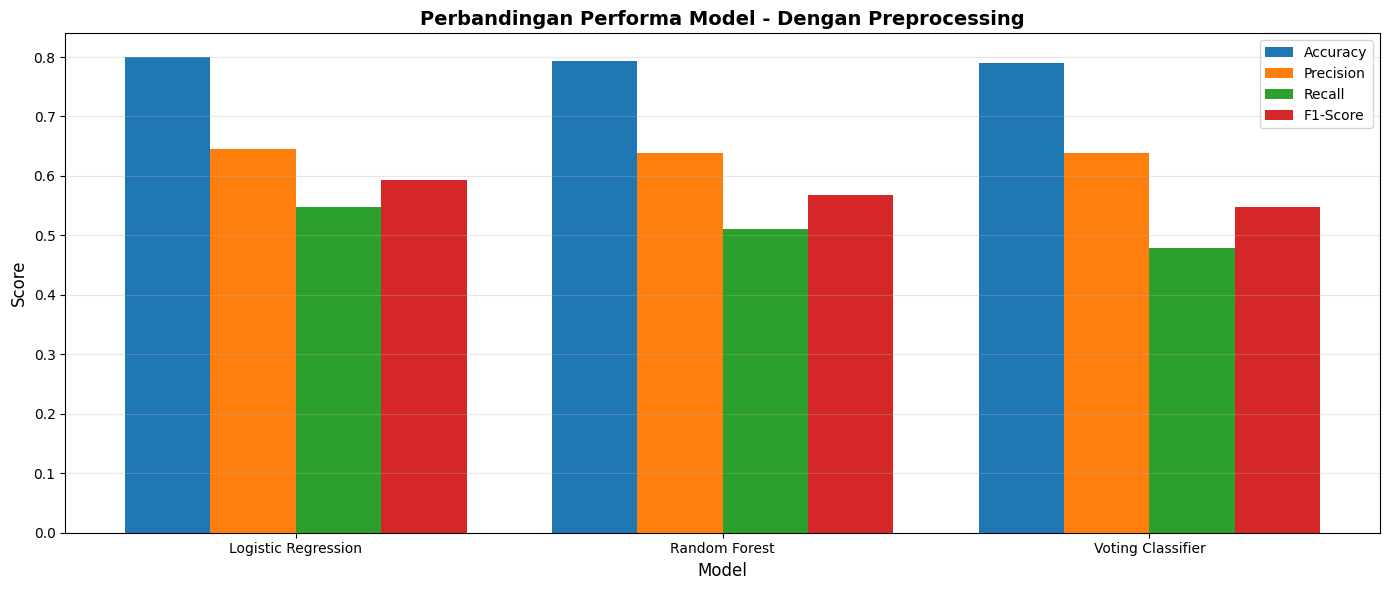


Model terbaik (Dengan Preprocessing): Logistic Regression


In [28]:
# ============================================================================
# 3.5. Perbandingan Performa Model
# ============================================================================

print("\n3.5. PERBANDINGAN PERFORMA MODEL DENGAN PREPROCESSING")
print("-" * 80)

# Buat DataFrame untuk perbandingan
comparison_prep = pd.DataFrame({
    'Model': list(results_prep.keys()),
    'Accuracy': [results_prep[m]['accuracy'] for m in results_prep.keys()],
    'Precision': [results_prep[m]['precision'] for m in results_prep.keys()],
    'Recall': [results_prep[m]['recall'] for m in results_prep.keys()],
    'F1-Score': [results_prep[m]['f1_score'] for m in results_prep.keys()]
})

print("\nTabel Perbandingan Performa:")
print(comparison_prep.to_string(index=False))

# Visualisasi perbandingan
fig, ax = plt.subplots(figsize=(14, 6))

for i, metric in enumerate(metrics):
    offset = width * (i - 1.5)
    ax.bar(x + offset, comparison_prep[metric], width, label=metric)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Perbandingan Performa Model - Dengan Preprocessing', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_prep['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Identifikasi model terbaik
best_model_prep = comparison_prep.loc[comparison_prep['F1-Score'].idxmax(), 'Model']
print(f"\nModel terbaik (Dengan Preprocessing): {best_model_prep}")



3.6. PERBANDINGAN: DIRECT MODELING VS PREPROCESSING
--------------------------------------------------------------------------------

Perbandingan Lengkap:
              Model  Accuracy  Precision   Recall  F1-Score      Skenario
Logistic Regression  0.799148   0.640867 0.553476  0.593974        Direct
      Random Forest  0.792051   0.637288 0.502674  0.562033        Direct
  Voting Classifier  0.796309   0.676113 0.446524  0.537842        Direct
Logistic Regression  0.799858   0.644654 0.548128  0.592486 Preprocessing
      Random Forest  0.793471   0.638796 0.510695  0.567608 Preprocessing
  Voting Classifier  0.789922   0.639286 0.478610  0.547401 Preprocessing


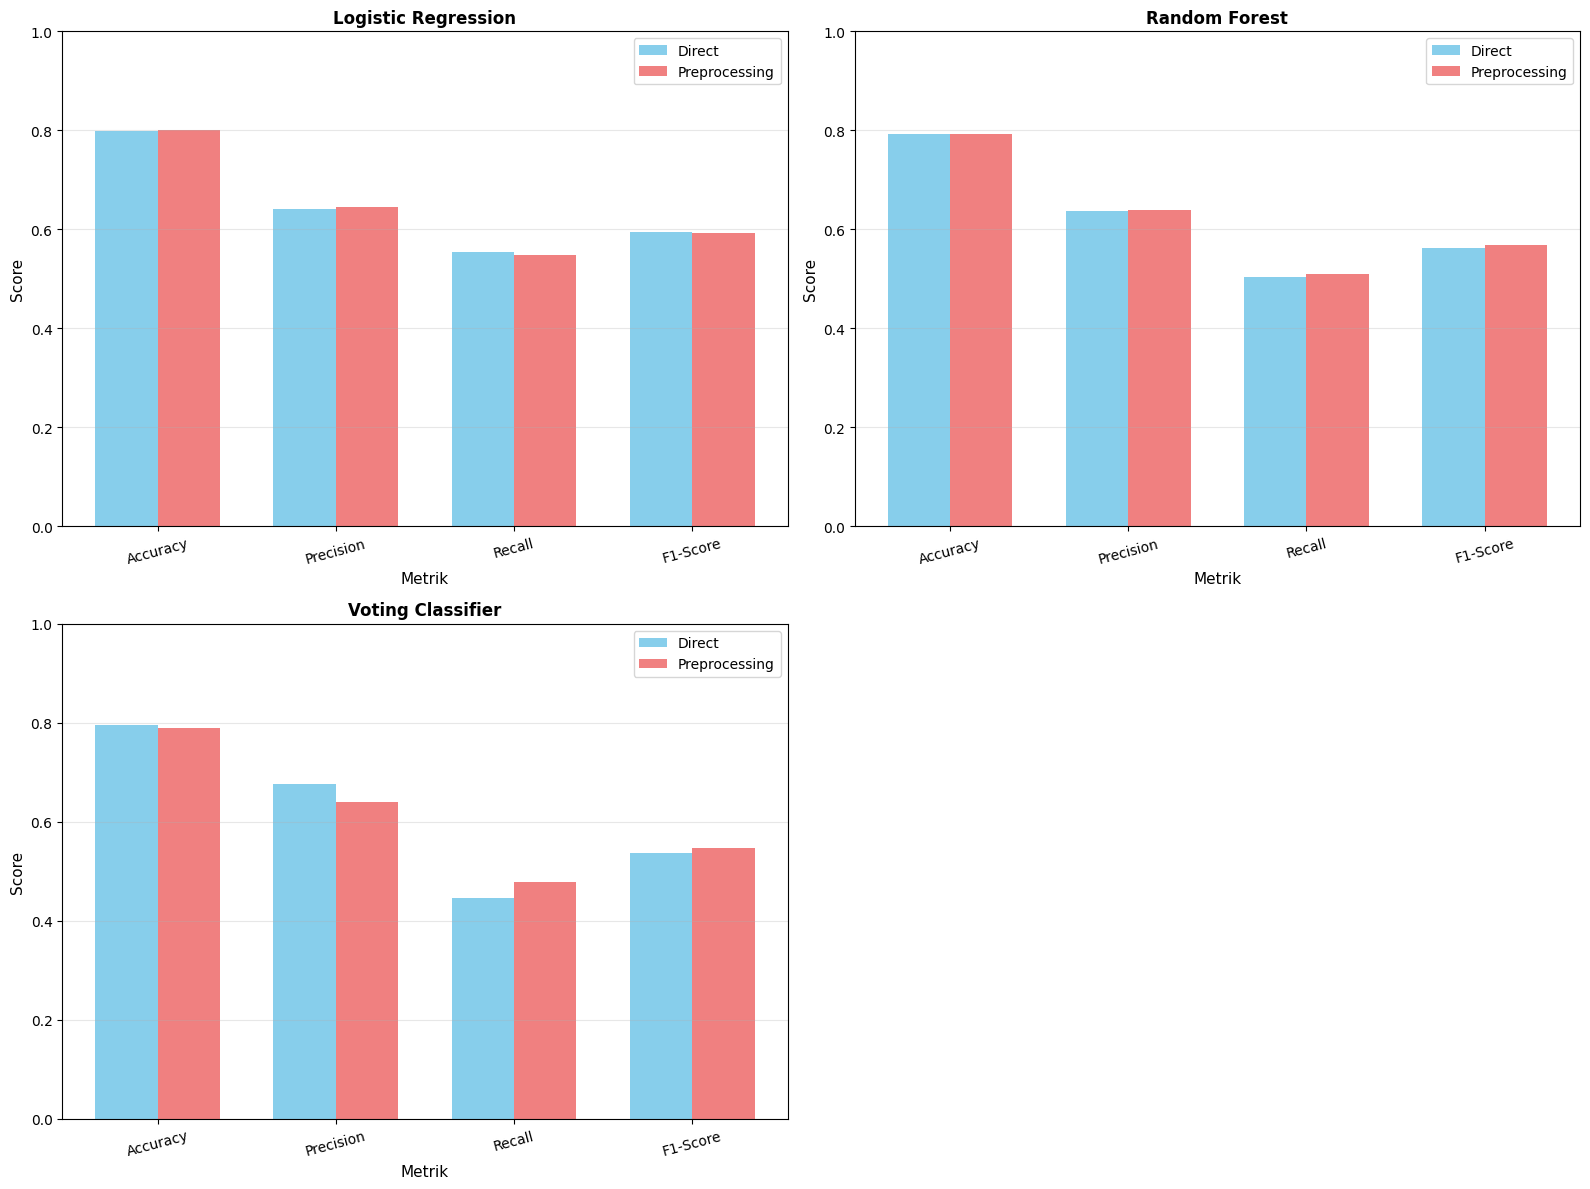


Modeling dengan Preprocessing selesai!


In [29]:
# ============================================================================
# 3.6. Perbandingan Direct vs Preprocessing
# ============================================================================

print("\n3.6. PERBANDINGAN: DIRECT MODELING VS PREPROCESSING")
print("-" * 80)

# Gabungkan hasil
comparison_direct['Skenario'] = 'Direct'
comparison_prep['Skenario'] = 'Preprocessing'
comparison_all = pd.concat([comparison_direct, comparison_prep])

print("\nPerbandingan Lengkap:")
print(comparison_all.to_string(index=False))

# Visualisasi perbandingan untuk setiap model
models_list = comparison_direct['Model'].unique()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, model_name in enumerate(models_list):
    model_data = comparison_all[comparison_all['Model'] == model_name]

    x_pos = np.arange(len(metrics))
    width = 0.35

    direct_scores = model_data[model_data['Skenario'] == 'Direct'][metrics].values[0]
    prep_scores = model_data[model_data['Skenario'] == 'Preprocessing'][metrics].values[0]

    axes[idx].bar(x_pos - width/2, direct_scores, width, label='Direct', color='skyblue')
    axes[idx].bar(x_pos + width/2, prep_scores, width, label='Preprocessing', color='lightcoral')

    axes[idx].set_xlabel('Metrik', fontsize=11)
    axes[idx].set_ylabel('Score', fontsize=11)
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(metrics, rotation=15)
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim([0, 1])

# Hapus subplot keempat jika hanya ada 3 model
if len(models_list) < 4:
    fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

print("\nModeling dengan Preprocessing selesai!")

# 4. HYPERPARAMETER TUNING

In [30]:
# Menggunakan data yang sudah dipreprocessing
print("\nMenggunakan data hasil preprocessing untuk hyperparameter tuning")


Menggunakan data hasil preprocessing untuk hyperparameter tuning


In [31]:
# ============================================================================
# 4.1. Hyperparameter Tuning - Logistic Regression
# ============================================================================

print("\n4.1. HYPERPARAMETER TUNING - LOGISTIC REGRESSION")
print("-" * 80)

# Parameter grid untuk Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

print("Parameter Grid:")
print(param_grid_lr)

# GridSearchCV
print("\nMemulai GridSearchCV untuk Logistic Regression...")
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train_prep, y_train_prep)

print("\nHasil Tuning Logistic Regression:")
print(f"Best Parameters: {grid_search_lr.best_params_}")
print(f"Best F1-Score (CV): {grid_search_lr.best_score_:.4f}")

# Best model
best_model_lr = grid_search_lr.best_estimator_


4.1. HYPERPARAMETER TUNING - LOGISTIC REGRESSION
--------------------------------------------------------------------------------
Parameter Grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

Memulai GridSearchCV untuk Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Hasil Tuning Logistic Regression:
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-Score (CV): 0.5961


In [32]:
# ============================================================================
# 4.2. Hyperparameter Tuning - Random Forest
# ============================================================================

print("\n4.2. HYPERPARAMETER TUNING - RANDOM FOREST")
print("-" * 80)

# Parameter grid untuk Random Forest (gunakan RandomizedSearchCV karena lebih efisien)
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

print("Parameter Distribution:")
print(param_dist_rf)

# RandomizedSearchCV
print("\nMemulai RandomizedSearchCV untuk Random Forest...")
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=50,  # Jumlah kombinasi yang akan dicoba
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_rf.fit(X_train_prep, y_train_prep)

print("\nHasil Tuning Random Forest:")
print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Best F1-Score (CV): {random_search_rf.best_score_:.4f}")

# Best model
best_model_rf = random_search_rf.best_estimator_



4.2. HYPERPARAMETER TUNING - RANDOM FOREST
--------------------------------------------------------------------------------
Parameter Distribution:
{'n_estimators': [50, 100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2'], 'bootstrap': [True, False]}

Memulai RandomizedSearchCV untuk Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Hasil Tuning Random Forest:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best F1-Score (CV): 0.5681


In [33]:
# ============================================================================
# 4.3. Hyperparameter Tuning - Voting Classifier
# ============================================================================

print("\n4.3. HYPERPARAMETER TUNING - VOTING CLASSIFIER")
print("-" * 80)

# Untuk Voting Classifier, kita akan tune parameter dari estimator individual
# Gunakan best parameters dari LR yang sudah ditemukan, dan tune yang lain

param_grid_voting = {
    'lr__C': [grid_search_lr.best_params_['C']],
    'lr__penalty': [grid_search_lr.best_params_['penalty']],
    'lr__solver': [grid_search_lr.best_params_['solver']],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['rbf', 'linear'],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

print("Parameter Grid:")
print(param_grid_voting)

# Inisialisasi Voting Classifier dengan estimator
voting_clf_tuning = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('svm', SVC(random_state=42, probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

# GridSearchCV
print("\nMemulai GridSearchCV untuk Voting Classifier...")
grid_search_voting = GridSearchCV(
    estimator=voting_clf_tuning,
    param_grid=param_grid_voting,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_voting.fit(X_train_prep, y_train_prep)

print("\nHasil Tuning Voting Classifier:")
print(f"Best Parameters: {grid_search_voting.best_params_}")
print(f"Best F1-Score (CV): {grid_search_voting.best_score_:.4f}")

# Best model
best_model_voting = grid_search_voting.best_estimator_



4.3. HYPERPARAMETER TUNING - VOTING CLASSIFIER
--------------------------------------------------------------------------------
Parameter Grid:
{'lr__C': [1], 'lr__penalty': ['l2'], 'lr__solver': ['liblinear'], 'svm__C': [0.1, 1, 10], 'svm__kernel': ['rbf', 'linear'], 'knn__n_neighbors': [3, 5, 7, 9], 'knn__weights': ['uniform', 'distance']}

Memulai GridSearchCV untuk Voting Classifier...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Hasil Tuning Voting Classifier:
Best Parameters: {'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'svm__C': 0.1, 'svm__kernel': 'linear'}
Best F1-Score (CV): 0.5797



4.4. EVALUASI MODEL SETELAH HYPERPARAMETER TUNING
--------------------------------------------------------------------------------

HASIL EVALUASI: Logistic Regression (Tuned)
Accuracy  : 0.7984
Precision : 0.6406
Recall    : 0.5481
F1-Score  : 0.5908

Confusion Matrix:
[[920 115]
 [169 205]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1035
       Churn       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



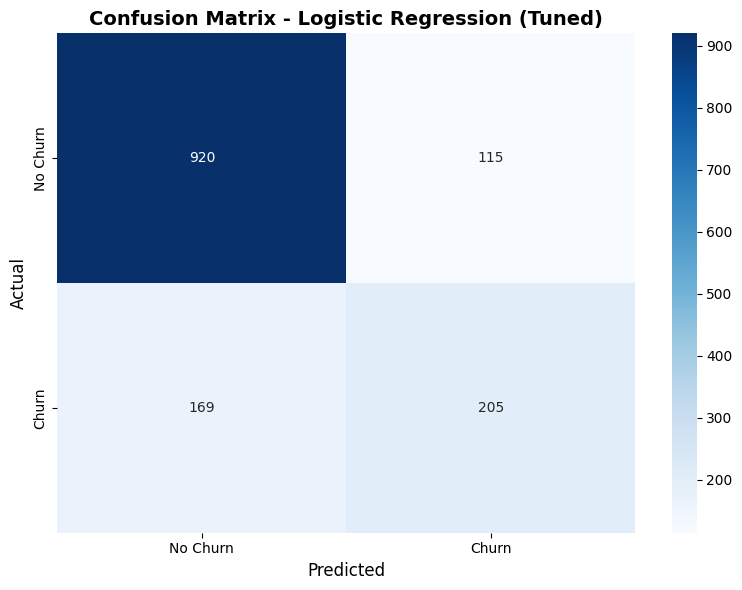


HASIL EVALUASI: Random Forest (Tuned)
Accuracy  : 0.7991
Precision : 0.6574
Recall    : 0.5080
F1-Score  : 0.5732

Confusion Matrix:
[[936  99]
 [184 190]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



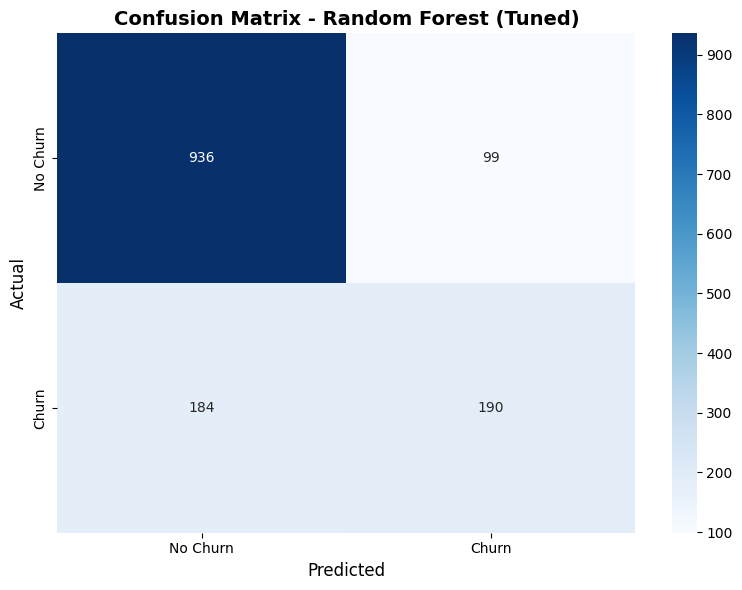


HASIL EVALUASI: Voting Classifier (Tuned)
Accuracy  : 0.7864
Precision : 0.6229
Recall    : 0.4947
F1-Score  : 0.5514

Confusion Matrix:
[[923 112]
 [189 185]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1035
       Churn       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



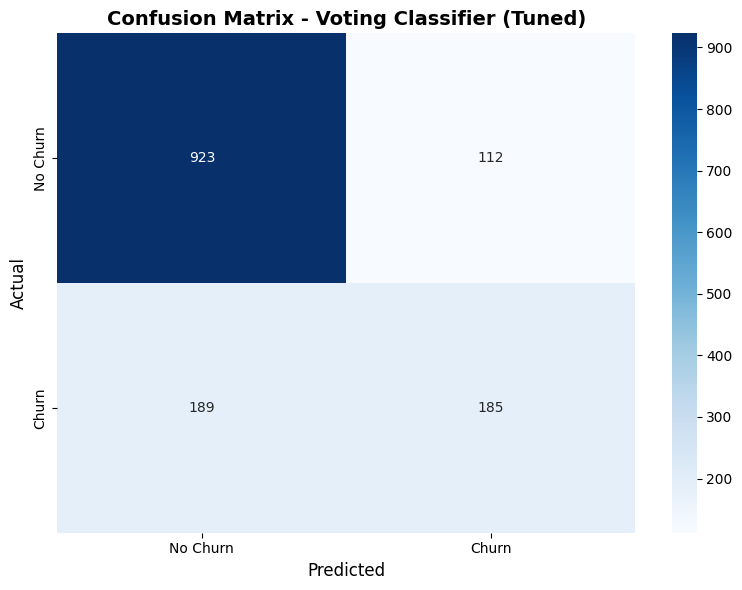

In [34]:
# ============================================================================
# 4.4. Evaluasi Model Setelah Tuning
# ============================================================================

print("\n4.4. EVALUASI MODEL SETELAH HYPERPARAMETER TUNING")
print("-" * 80)

# Dictionary untuk menyimpan best models
best_models = {
    'Logistic Regression': best_model_lr,
    'Random Forest': best_model_rf,
    'Voting Classifier': best_model_voting
}

# Evaluasi semua best models
results_tuned = {}
for name, model in best_models.items():
    results_tuned[name] = evaluate_model(model, X_test_prep, y_test_prep, f"{name} (Tuned)")



4.5. PERBANDINGAN PERFORMA MODEL SETELAH TUNING
--------------------------------------------------------------------------------

Tabel Perbandingan Performa:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.798439   0.640625 0.548128  0.590778
      Random Forest  0.799148   0.657439 0.508021  0.573152
  Voting Classifier  0.786373   0.622896 0.494652  0.551416


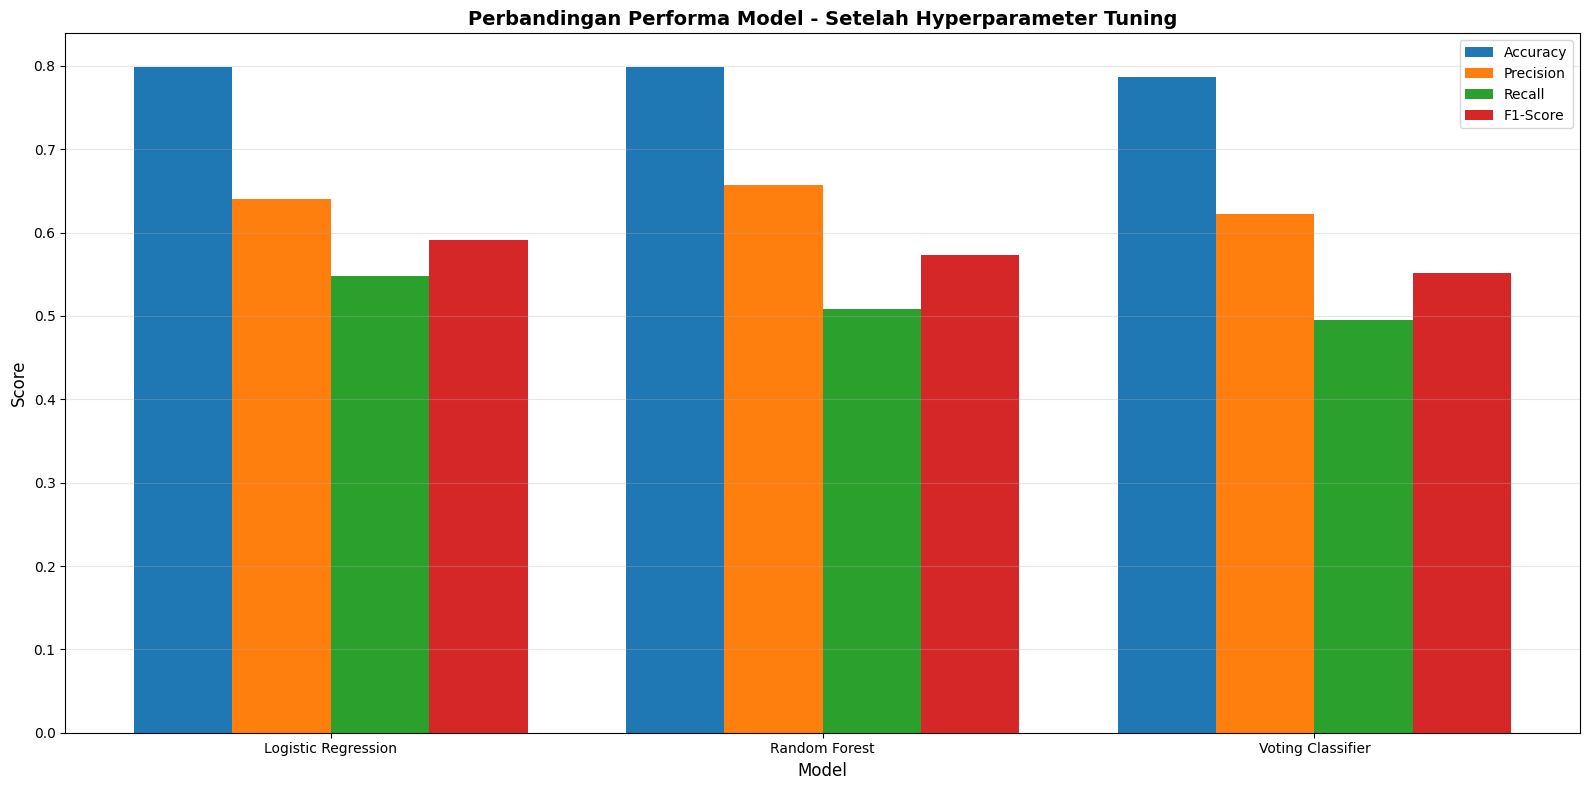

In [35]:
# ============================================================================
# 4.5. Perbandingan Performa Model Setelah Tuning
# ============================================================================

print("\n4.5. PERBANDINGAN PERFORMA MODEL SETELAH TUNING")
print("-" * 80)

# Buat DataFrame untuk perbandingan
comparison_tuned = pd.DataFrame({
    'Model': list(results_tuned.keys()),
    'Accuracy': [results_tuned[m]['accuracy'] for m in results_tuned.keys()],
    'Precision': [results_tuned[m]['precision'] for m in results_tuned.keys()],
    'Recall': [results_tuned[m]['recall'] for m in results_tuned.keys()],
    'F1-Score': [results_tuned[m]['f1_score'] for m in results_tuned.keys()]
})

print("\nTabel Perbandingan Performa:")
print(comparison_tuned.to_string(index=False))

# Visualisasi perbandingan
fig, ax = plt.subplots(figsize=(16, 8))
width = 0.2

for i, metric in enumerate(metrics):
    offset = width * (i - 1.5)
    ax.bar(x + offset, comparison_tuned[metric], width, label=metric)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Perbandingan Performa Model - Setelah Hyperparameter Tuning', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_tuned['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


4.6. PERBANDINGAN LENGKAP: SEMUA SKENARIO
--------------------------------------------------------------------------------

Perbandingan Lengkap Semua Skenario:
              Model  Accuracy  Precision   Recall  F1-Score      Skenario
Logistic Regression  0.799148   0.640867 0.553476  0.593974        Direct
      Random Forest  0.792051   0.637288 0.502674  0.562033        Direct
  Voting Classifier  0.796309   0.676113 0.446524  0.537842        Direct
Logistic Regression  0.799858   0.644654 0.548128  0.592486 Preprocessing
      Random Forest  0.793471   0.638796 0.510695  0.567608 Preprocessing
  Voting Classifier  0.789922   0.639286 0.478610  0.547401 Preprocessing
Logistic Regression  0.798439   0.640625 0.548128  0.590778         Tuned
      Random Forest  0.799148   0.657439 0.508021  0.573152         Tuned
  Voting Classifier  0.786373   0.622896 0.494652  0.551416         Tuned


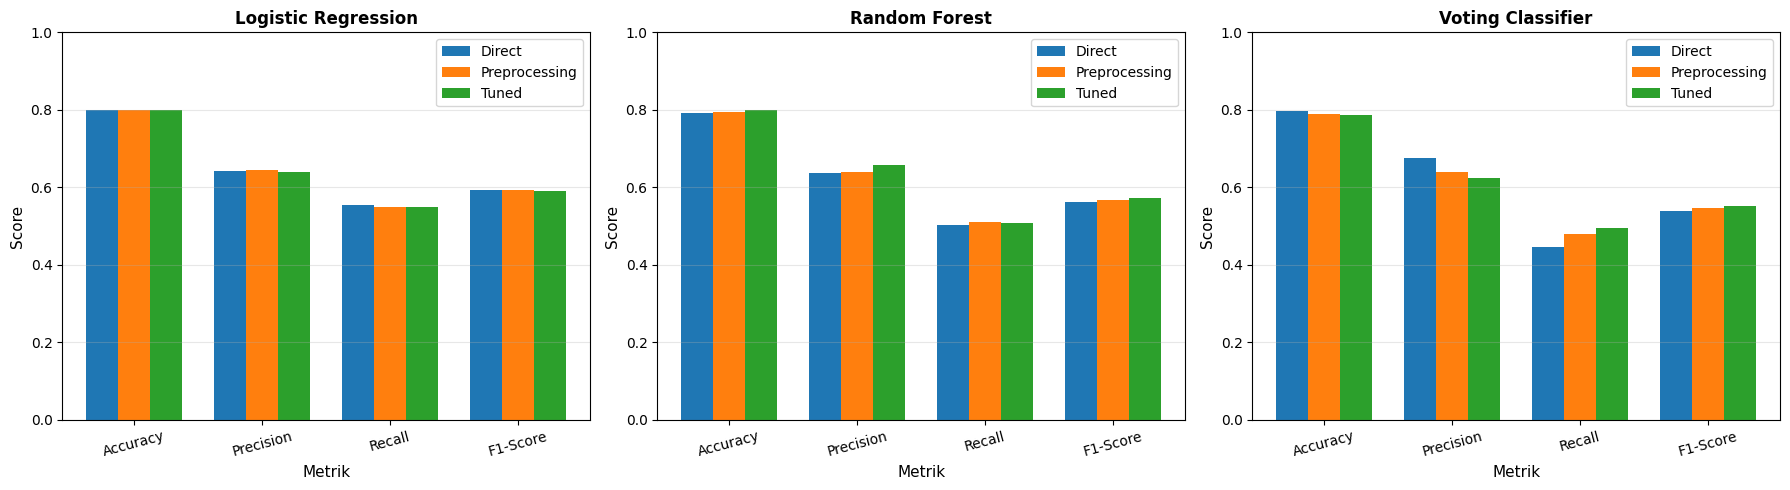


MODEL TERBAIK SECARA KESELURUHAN
Model      : Logistic Regression
Skenario   : Direct
F1-Score   : 0.5940
Accuracy   : 0.7991
Precision  : 0.6409
Recall     : 0.5535

Hyperparameter Tuning selesai!


In [36]:
# ============================================================================
# 4.6. Perbandingan Semua Skenario
# ============================================================================

print("\n4.6. PERBANDINGAN LENGKAP: SEMUA SKENARIO")
print("-" * 80)

# Tambahkan skenario
comparison_direct['Skenario'] = 'Direct'
comparison_prep['Skenario'] = 'Preprocessing'
comparison_tuned['Skenario'] = 'Tuned'

# Gabungkan semua hasil
final_comparison = pd.concat(
    [comparison_direct, comparison_prep, comparison_tuned],
    ignore_index=True   # <-- WAJIB agar index unik
)

print("\nPerbandingan Lengkap Semua Skenario:")
print(final_comparison.to_string(index=False))

# Visualisasi perbandingan lengkap untuk setiap model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model_name in enumerate(models_list):
    model_data = final_comparison[final_comparison['Model'] == model_name]

    scenarios = ['Direct', 'Preprocessing', 'Tuned']
    x_pos = np.arange(len(metrics))
    width = 0.25

    for i, scenario in enumerate(scenarios):
        if scenario in model_data['Skenario'].values:
            scores = model_data[model_data['Skenario'] == scenario][metrics].values[0]
            offset = width * (i - 1)
            axes[idx].bar(x_pos + offset, scores, width, label=scenario)

    axes[idx].set_xlabel('Metrik', fontsize=11)
    axes[idx].set_ylabel('Score', fontsize=11)
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(metrics, rotation=15)
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Identifikasi model terbaik secara keseluruhan
best_overall_idx = final_comparison['F1-Score'].idxmax()
best_overall_model = final_comparison.loc[best_overall_idx, 'Model']
best_overall_scenario = final_comparison.loc[best_overall_idx, 'Skenario']
best_overall_f1 = final_comparison.loc[best_overall_idx, 'F1-Score']

print("\n" + "="*80)
print("MODEL TERBAIK SECARA KESELURUHAN")
print("="*80)
print(f"Model      : {best_overall_model}")
print(f"Skenario   : {best_overall_scenario}")
print(f"F1-Score   : {best_overall_f1:.4f}")
print(f"Accuracy   : {final_comparison.loc[best_overall_idx, 'Accuracy']:.4f}")
print(f"Precision  : {final_comparison.loc[best_overall_idx, 'Precision']:.4f}")
print(f"Recall     : {final_comparison.loc[best_overall_idx, 'Recall']:.4f}")

print("\nHyperparameter Tuning selesai!")

# 5. PERSIAPAN DEPLOYMENT

In [41]:
# ============================================================================
# 5. PERSIAPAN DEPLOYMENT - PILIH MODEL TERBAIK DARI TUNING
# ============================================================================

print("\n" + "="*80)
print("5. PERSIAPAN DEPLOYMENT - MODEL TERBAIK DARI HYPERPARAMETER TUNING")
print("="*80)

# PENTING: Pastikan variabel-variabel ini sudah ada dari script sebelumnya
# Jika belum, jalankan script hyperparameter tuning terlebih dahulu

# Dictionary untuk menyimpan model beserta prediksinya untuk evaluasi
models_for_evaluation = {}

# Membuat prediksi untuk model terbaik dan menyimpannya untuk evaluasi
for name, model in best_models.items():
    y_pred = model.predict(X_test_prep) # Membuat prediksi menggunakan data uji yang telah diproses sebelumnya.
    models_for_evaluation[name] = {
        'model': model,
        'predictions': y_pred
    }
print("Model dari hyperparameter tuning berhasil dimuat dan prediksi dibuat.")

# Evaluasi semua model tuned
print("\nHasil Evaluasi Model:")
print("-" * 80)
print(f"{'Model':<25} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 80)

tuned_results = {}
for model_name, data in models_for_evaluation.items():
    model = data['model']
    y_pred = data['predictions']

    # Evaluasi menggunakan target pengujian yang telah diproses sebelumnya y_test_prep
    acc = accuracy_score(y_test_prep, y_pred)
    prec = precision_score(y_test_prep, y_pred)
    rec = recall_score(y_test_prep, y_pred)
    f1 = f1_score(y_test_prep, y_pred)

    tuned_results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    }

    print(f"{model_name:<25} {acc:<12.4f} {prec:<12.4f} {rec:<12.4f} {f1:<12.4f}")

# Pilih model dengan F1-Score tertinggi
best_model_name_tuned = max(tuned_results, key=lambda x: tuned_results[x]['f1_score'])
best_model_metrics_tuned = tuned_results[best_model_name_tuned]
final_model = best_model_metrics_tuned['model']

print("\n" + "="*80)
print("MODEL TERBAIK TERPILIH")
print("="*80)
print(f"\nModel               : {best_model_name_tuned}")
print(f"Skenario            : Hyperparameter Tuning")
print(f"Accuracy            : {best_model_metrics_tuned['accuracy']:.4f}")
print(f"Precision           : {best_model_metrics_tuned['precision']:.4f}")
print(f"Recall              : {best_model_metrics_tuned['recall']:.4f}")
print(f"F1-Score            : {best_model_metrics_tuned['f1_score']:.4f}")

# Persiapan objek preprocessing untuk deployment
preprocessing_objects = {
    'scaler': scaler,
    'feature_names': X_prep.columns.tolist(), # Menggunakan kolom X_prep karena fitur-fitur tersebut diskalakan menggunakan ini
    'model_name': best_model_name_tuned,
    'model_metrics': {
        'accuracy': best_model_metrics_tuned['accuracy'],
        'precision': best_model_metrics_tuned['precision'],
        'recall': best_model_metrics_tuned['recall'],
        'f1_score': best_model_metrics_tuned['f1_score']
    },
    'preprocessing_info': {
        'nominal_cols': ['InternetService', 'Contract', 'PaymentMethod'],
        'binary_cols': ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling'],
        'numeric_cols': ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
    }
}


5. PERSIAPAN DEPLOYMENT - MODEL TERBAIK DARI HYPERPARAMETER TUNING
Model dari hyperparameter tuning berhasil dimuat dan prediksi dibuat.

Hasil Evaluasi Model:
--------------------------------------------------------------------------------
Model                     Accuracy     Precision    Recall       F1-Score    
--------------------------------------------------------------------------------
Logistic Regression       0.7984       0.6406       0.5481       0.5908      
Random Forest             0.7991       0.6574       0.5080       0.5732      
Voting Classifier         0.7864       0.6229       0.4947       0.5514      

MODEL TERBAIK TERPILIH

Model               : Logistic Regression
Skenario            : Hyperparameter Tuning
Accuracy            : 0.7984
Precision           : 0.6406
Recall              : 0.5481
F1-Score            : 0.5908


In [42]:
# ============================================================================
# 5.1. Simpan Model ke Google Drive
# ============================================================================

print("\n5.1. MENYIMPAN MODEL KE GOOGLE DRIVE")
print("-" * 80)

# Path untuk menyimpan model di Google Drive
model_save_path = '/content/drive/MyDrive/Bengkel Koding/UAS/Model/'

# Buat direktori jika belum ada
import os
os.makedirs(model_save_path, exist_ok=True)

# Simpan model
model_filename = f'{model_save_path}best_model_churn.pkl'
joblib.dump(final_model, model_filename)
print(f"Model disimpan di: {model_filename}")

# Simpan preprocessing objects jika ada
if preprocessing_objects is not None:
    preprocessing_filename = f'{model_save_path}preprocessing_objects.pkl'
    joblib.dump(preprocessing_objects, preprocessing_filename)
    print(f"Preprocessing objects disimpan di: {preprocessing_filename}")

# Simpan informasi model
model_info = {
    'model_name': best_overall_model,
    'scenario': best_overall_scenario,
    'f1_score': best_overall_f1,
    'accuracy': final_comparison.loc[best_overall_idx, 'Accuracy'],
    'precision': final_comparison.loc[best_overall_idx, 'Precision'],
    'recall': final_comparison.loc[best_overall_idx, 'Recall'],
    'feature_names': X_prep.columns.tolist() if best_overall_scenario != 'Direct' else X_direct.columns.tolist()
}

model_info_filename = f'{model_save_path}model_info.pkl'
joblib.dump(model_info, model_info_filename)
print(f"Informasi model disimpan di: {model_info_filename}")

# Simpan juga hasil perbandingan lengkap
comparison_filename = f'{model_save_path}model_comparison.csv'
final_comparison.to_csv(comparison_filename, index=False)
print(f"Hasil perbandingan disimpan di: {comparison_filename}")

print("\nSemua file untuk deployment telah disimpan ke Google Drive!")


5.1. MENYIMPAN MODEL KE GOOGLE DRIVE
--------------------------------------------------------------------------------
Model disimpan di: /content/drive/MyDrive/Bengkel Koding/UAS/Model/best_model_churn.pkl
Preprocessing objects disimpan di: /content/drive/MyDrive/Bengkel Koding/UAS/Model/preprocessing_objects.pkl
Informasi model disimpan di: /content/drive/MyDrive/Bengkel Koding/UAS/Model/model_info.pkl
Hasil perbandingan disimpan di: /content/drive/MyDrive/Bengkel Koding/UAS/Model/model_comparison.csv

Semua file untuk deployment telah disimpan ke Google Drive!


In [43]:
import joblib

# Membuat dictionary untuk menyimpan semua objek penting
# Pastikan variabel 'final_model', 'scaler', 'label_encoders_prep', dan 'X_prep' sudah didefinisikan sebelumnya
deployment_assets = {
    'model': final_model,
    'scaler': scaler,
    'label_encoders': label_encoders_prep,
    'feature_names': X_prep.columns.tolist(),
    'cols_to_scale': ['tenure', 'MonthlyCharges', 'TotalCharges']
}

# Simpan ke file .pkl
joblib.dump(deployment_assets, 'churn_model_assets.pkl')
print("File 'churn_model_assets.pkl' berhasil dibuat. Silakan download file ini!")

File 'churn_model_assets.pkl' berhasil dibuat. Silakan download file ini!
